In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#frog_tongue=pd.read_csv('frog_tongue.csv')
#sheffield_weather_station=pd.read_csv('sheffield_weather_station.csv')
#bee_sperm=pd.read_csv('https://assets.datacamp.com/production/course_1550/datasets/bee_sperm.csv')

In [2]:

anscombe=pd.read_csv('anscombe.csv')
female_literacy_fertility=pd.read_csv('female_literacy_fertility.csv')
finch_beaks_1975=pd.read_csv('finch_beaks_1975.csv')
finch_beaks_2012=pd.read_csv('finch_beaks_2012.csv')
fortis_beak_depth_heredity=pd.read_csv('fortis_beak_depth_heredity.csv')
mlb_nohitters=pd.read_csv('mlb_nohitters.csv')
scandens_beak_depth_heredity=pd.read_csv('scandens_beak_depth_heredity.csv')


FileNotFoundError: File b'anscombe.csv' does not exist

## Parameter estimation by optimization
When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best describe your data.

### Optimal parameters
Parameter values that bring the model in closest agreement with the data
#### Problem 1 -- How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call ττ, the typical interval time. The value of the parameter ττ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the ττ you found and plot the histogram as an approximation to the PDF.

`NumPy, pandas, matlotlib.pyplot`, and seaborn have been imported for you as `np, pd, plt`, and `sns`, respectively.

In [11]:
mlb_nohitters.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [14]:
mlb=mlb_nohitters.dropna()

In [15]:
mlb.head()

,date,game_number,winning_team,losing_team,winning_pitcher
66,19120704,33588,DET,SLA,George Mullin
67,19120830,34018,SLA,DET,Earl Hamilton
68,19120906,34081,NY1,PHI,Jeff Tesreau
69,19140531,35960,CHA,CLE,Joe Benz
70,19140909,37065,BSN,PHI,Iron Davis


In [267]:
nohitter_times=np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

In [6]:
len(nohitter_times)

251

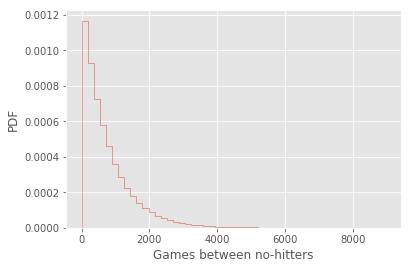

In [24]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')


# Show the plot
plt.show()

#### Do the data follow our story?
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

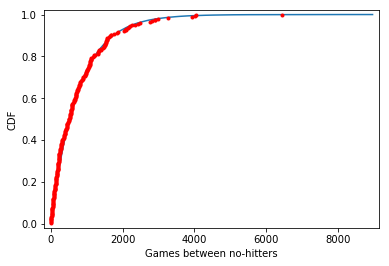

In [14]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', color='r')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

#### How is this parameter optimal?
Now sample out of an exponential distribution with ττ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.



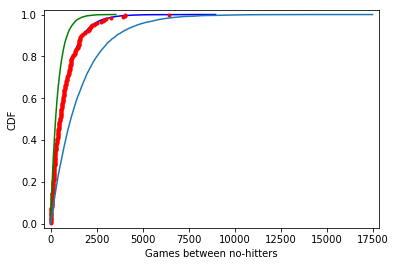

In [17]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor, color='b')
plt.plot(x, y, marker='.', linestyle='none',color='r')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, color='g')
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

### Stochastic Thinking


In [18]:
import random

def rollDie():
    """Return a random number int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

def testRoll(n=10):
    result=''
    for i in range(n):
        result=result+str(rollDie())
    print(result)
    


In [22]:
# a Simulation of Die Rolling
random.seed(0)
def runSim(goal, numTrials, txt):
    total=0
    for i in range(numTrials):
        result=''
        for j in range(len(goal)):
            result += str(rollDie())
        if result==goal:
            total +=1
    print('Actual probability of', txt, '=', round(1/(6**len(goal)), 8))
    estProbability= round(total/numTrials, 8)
    print('Estimated POrobability of', txt, '=',round(estProbability,8))

In [24]:
runSim('11111',1000000,'11111')

Actual probability of 11111 = 0.0001286
Estimated POrobability of 11111 = 0.000128


#### The Birthday Problem
* What's the probability of at least two people in a group having the same birthday
* If there are 367 people in the group?
* What about smaller numbers?
* If we assume  that each birthdate is equally likely
* Without this assumption, VERY complicated


In [29]:
# Approximating using a simulation
def sameDate(numPeople, numSame):
    possibleDates= range(366)
    birthdays =[0]*366
    for p in range(numPeople):
        birthDate = random.choice(possibleDates)
        birthdays[birthDate]+=1
    return max(birthdays)>=numSame



In [26]:
def birthdayProb(numPeople, numSame, numTrials):
    numHits=0
    for t in range(numTrials):
        if sameDate(numPeople, numSame):
            numHits +=1
    return numHits/numTrials

In [31]:
import math
for numPeople in [10,20,40,100]:
    print('For', numPeople, 'est. prob. of shared birthday is', birthdayProb(numPeople,3, 10000))
    numerator=math.factorial(366)
    denom= (366**numPeople)*math.factorial(366-numPeople)
    print('Actual prob. for N = 100 =', 1-numerator/denom)

For 10 est. prob. of shared birthday is 0.0007
Actual prob. for N = 100 = 0.1166454118039999
For 20 est. prob. of shared birthday is 0.0072
Actual prob. for N = 100 = 0.4105696370550831
For 40 est. prob. of shared birthday is 0.0665
Actual prob. for N = 100 = 0.89054476188945
For 100 est. prob. of shared birthday is 0.6421
Actual prob. for N = 100 = 0.9999996784357714


In [2]:
female_literacy_fertility.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [32]:
fertility=np.array(female_literacy_fertility['fertility'])
illiteracy=np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

#### EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

In [3]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

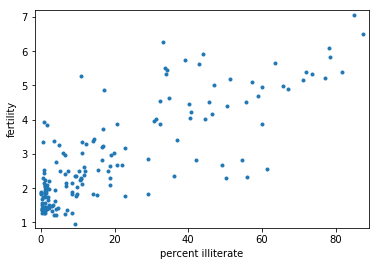

0.804132402682


In [12]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

#### Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, `f=ai+b`, where `a` is the slope and `b` is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


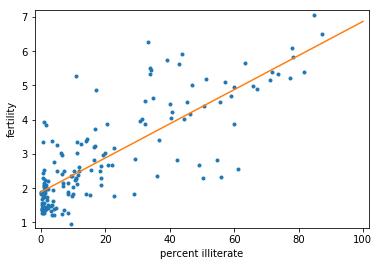

In [13]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

#### How is it optimal?
The function `np.polyfit()` that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

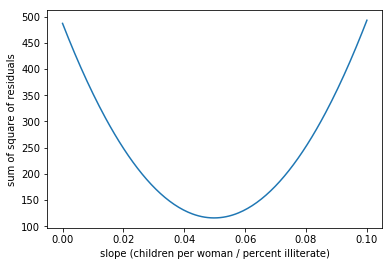

In [16]:
y_data=fertility
x_data=illiteracy

# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((y_data - a*x_data - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

# Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals,
# is the same value you got when performing the regression.

### Generating bootstrap replicates
** Bootstapping **
* The use of resampled data to perform statistical inference

** Bootstap sample **
* A resampled array of the data
** Bootstrap replicate **
* Is the value of the statistesct computed from de bootstrap sample (A statistic computed from a resampled array) like std,mean, median

#### Visualizing bootstrap samples

In this exercise, you will generate bootstrap samples from the set of annual `rainfall` data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [3]:
sheffield_weather=pd.read_csv('sheffield_weather_station.csv', header=0, delimiter=r"\s+")

In [4]:
sheffield_weather.set_index('yyyy');
sheffield_weather.info();
sheffield_weather.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 7 columns):
yyyy    1602 non-null int64
mm      1602 non-null int64
tmax    1602 non-null object
tmin    1602 non-null object
af      1602 non-null object
rain    1602 non-null float64
sun     1602 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 87.7+ KB


,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---
5,1883,6,17.7,9.3,0,66.2,---
6,1883,7,18.8,10.5,0,77.6,---
7,1883,8,19.8,10.9,0,32.5,---
8,1883,9,16.8,10.0,0,137.4,---
9,1883,10,12.7,6.4,0,102.9,---


In [6]:
rain=np.array(sheffield_weather['rain'])
mm=np.array(sheffield_weather['mm'])

In [7]:
rainfall=mm*rain

In [67]:
rainfall

array([ 122.1,  139.6,   88.8, ...,  263.2,  291. ,  782.4])

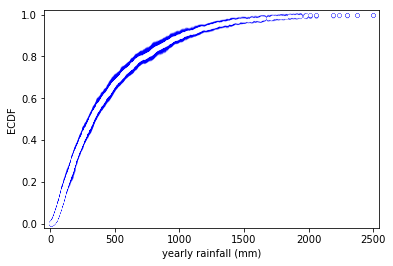

In [14]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='b', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x,y, marker='.', linestyle='none',color='w')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Bootstrap confidence intervals
#### Generating many bootstrap replicates
The function `bootstrap_replicate_1d()` from the video is available in your namespace. Now you'll write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

In [4]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [5]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

#### Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability distribution function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the **standard error of the mean**, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`. Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called `rainfall`.

10.0459164052
9.94736801881


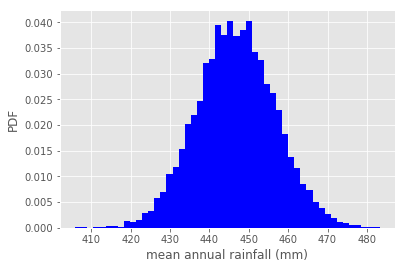

In [20]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, func=np.mean,size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True, color='b')
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')
_ = plt.style.use('ggplot')

# Show the plot
plt.show()

#### Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

In [ ]:
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

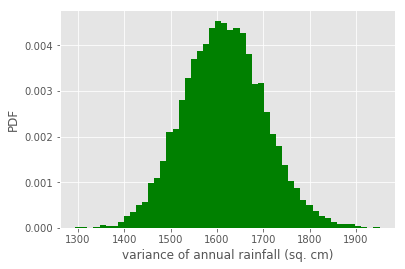

In [22]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var,size=10000)

# Put the variance in units of square centimeters
bs_replicates=bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True,color='g')
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Confidence interval on the rate of no-hitters
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [ 661.65727092  871.49442231] games


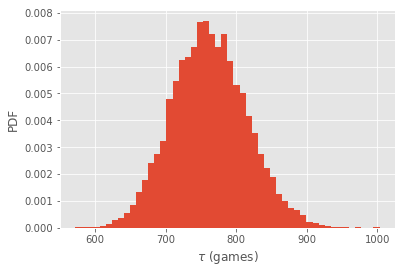

In [28]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times,np.mean,size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', format(conf_int), 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Pairs bootstrap

**Nonparametric**
* Make no assumptions about the model or probability distribution underlying the data

**Pairs bootstrap for linear regression **
* Resample data in pairs
* Compute slope and intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence intervals from percentiles of bootstrap replicates

#### A function to do pairs bootstrap
pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

In [6]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


#### Pairs bootstrap of literacy/fertility data


[ 0.04429373  0.05561359]


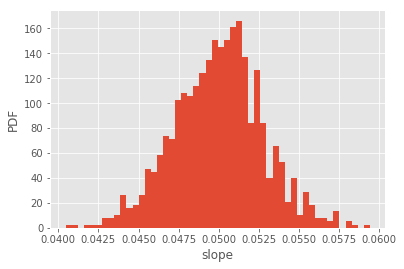

In [33]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

#### Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as `bs_slope_reps` and `bs_intercept_reps`).

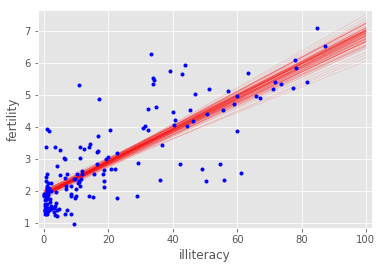

In [35]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy,fertility, marker='.', linestyle='none',color='b')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

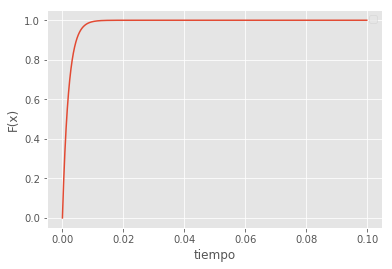

In [323]:

t0=np.arange(0,0.1,0.0001)
inv=1 - np.exp(-t*500)
_=plt.legend('1 - e^(-500t)')
_=plt.xlabel('tiempo')
_=plt.ylabel('F(x)')
_=plt.plot(t,inv)
plt.show()

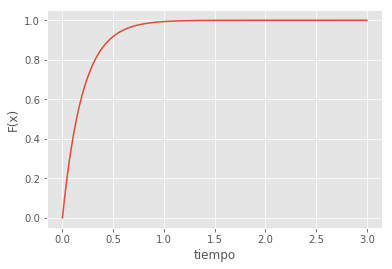

In [324]:
t1=np.arange(0,3,0.001)
inversa=1 - np.exp(-5*t1)
_=plt.plot(t1,inversa)
_=plt.xlabel('tiempo')
_=plt.ylabel('F(x)')
plt.show()

### Formulating and simulating a hypothesis
Assessment of how reasonable the observed data are assuming a hypothesis is true

*Permutation*
* Random rordering of entries in an array

####  Generating a permutation sample
The permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last `n2` entries as the permutation sample of the second array.

In [7]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

#### Visualizing permutation sampling
To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays rain_july and rain_november.

In [75]:
rain=sheffield_weather['rain']
rain_july=sheffield_weather[sheffield_weather['mm']==6]
rain_july=rain_july['rain']
rain_november=sheffield_weather['rain'][sheffield_weather['mm']==11]

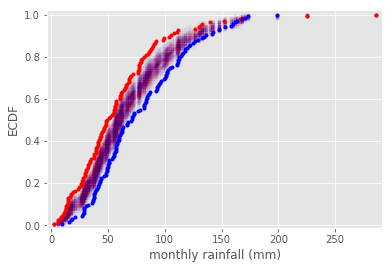

In [76]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

## Test statistics and p-values

** Test Statistic**
* A single number that can be computed from observed data and you simulate under the null hypothesis
* It is a comparison between what you observed and what you predict

**p-value**
* The probability of obtain a value of your test statistics that is at least as extreme as what was observed, under the assumption the null hypothesis is true
* NOT the probability that the null hypothesis is True

### Generating permutation replicates
A permutation replicate is a single value of a statistic computed from a permutation sample. As the `draw_bs_reps()` function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function,` draw_perm_reps()`, to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.


In [8]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

#### Look before you leap: EDA before hypothesis testing


In [161]:
frog_tongue=pd.read_csv('frog_tongue.csv', header=0, error_bad_lines=False, parse_dates=['date'])

In [170]:
#frog_tongue.dropna()
frog_tongue.tail()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
75,2013_06_18,IV,4,402,38,3.00,-302,986,2.25,-0.122,117,30,0.07,3446,-2591
76,2013_06_21,IV,1,605,39,4.50,-216,1627,1.61,-0.139,123,20,1.00,4928,-1759
77,2013_06_21,IV,2,711,76,5.30,-163,2021,1.21,-0.217,129,42,0.97,5498,-1257
78,2013_06_21,IV,3,614,33,4.57,-367,1366,2.73,-0.198,128,108,0.46,4776,-2857
79,2013_06_21,IV,4,468,36,3.48,-218,1269,1.63,-0.122,129,68,0.61,3617,-1688


In [194]:
#frog_tongue.iloc[20:79]


In [201]:
#force=frog_tongue['impact force (mN)']/=1000
impact_force=frog_tongue[['ID','impact force (mN)']]         
#impact_force=impact_force.div(1000)
impact_force=impact_force.iloc[20:80]
impact_force.head()

,ID,impact force (mN)
20,II,1612
21,II,605
22,II,327
23,II,946
24,II,541


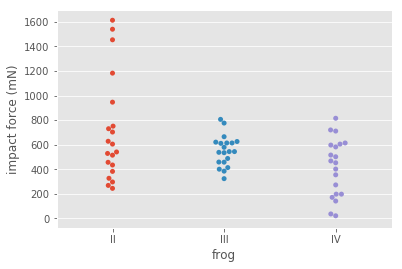

In [203]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID',y='impact force (mN)', data=impact_force)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (mN)')

# Show the plot
plt.show()


### Permutation test on frog data

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

In [214]:
force_a=impact_force[impact_force['ID']=='II']
force_b=impact_force[impact_force['ID']=='IV']
force_a=force_a['impact force (mN)']
force_b=force_b['impact force (mN)']

In [9]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff


In [216]:
dif=diff_of_means(force_a,force_b)
dif


288.25

In [217]:

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,diff_of_means, size=10000)
                                

# Compute p-value: p
p = np.sum(perm_replicates>=empirical_diff_means ) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0051


The p-value tells you that there is about a 0.5% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.0051 and p = 0.0000000051 are both said to be "statistically significant," but they are definitely not the same!

### Bootstrap hypothesis tests

##### Pipeline for hypothesis testing

* Clearly state of the null hypothesis
* Define your test statistic
* Generate many sets of simulated data assuming the null hypothesis is true
* Compete the test statistic for each simulated data set
* The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme  as for the real data

#### A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B *if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true*. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [237]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b-np.mean(force_b) + 550

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean , 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0047


### A bootstrap test for identical distributions
We looked at a one-sample test, but we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that the Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with `n1` and `n2` entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first `n1` entries of the bootstrap sample as belonging to the first data set and the last `n2` as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is less than what was observed.

Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

In [238]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a,force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates>=empirical_diff_means)/ 10000
print('p-value =', p)


p-value = 0.0071


### A two-sample bootstrap hypothesis test for difference of means.
You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [255]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates>=empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0052


### A/B testing
#### The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yay. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yay

In [265]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


#### A time-on-website analog
It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that is actually a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

In [282]:
nht=nohitter_times
nht_live=np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])
nht_dead=np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

In [277]:
mlb=pd.read_csv('mlb_nohitters.csv', parse_dates=True,index_col='date')
mlb.head()

,game_number,winning_team,losing_team,winning_pitcher
date,,,,
1876-07-15,140,NaN,NaN,NaN
1880-06-12,1035,NaN,NaN,NaN
1880-06-17,1046,NaN,NaN,NaN
1880-08-19,1177,NaN,NaN,NaN
1880-08-20,1179,NaN,NaN,NaN


In [288]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates<=nht_diff_obs) / len(perm_replicates)
print('p-val =',p)

p-val = 0.0002


## Test of correlation
#### Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [71]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [292]:
r_obs=pearson_r(illiteracy,fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted,fertility)

# Compute p-value: p
p = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


### Problem 
#### Do neonicotinoid insecticides have unintended consequences?

You will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

In [10]:
bee_sperm=pd.read_csv('https://assets.datacamp.com/production/course_1550/datasets/bee_sperm.csv',comment='#')
bee_sperm.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [314]:
control=bee_sperm[bee_sperm['Treatment']=='Control']
control=control['Alive Sperm Millions']
treated=bee_sperm[bee_sperm['Treatment']=='Pesticide']['Alive Sperm Millions']


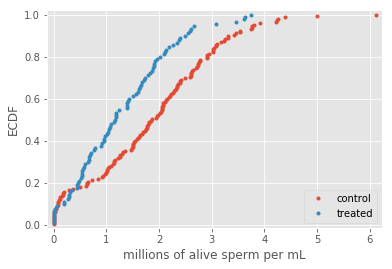

In [316]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
_=plt.plot(x_control, y_control, marker='.', linestyle='none')
_=plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

#### Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

In [317]:
# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control,treated)

# Compute mean of pooled data: mean_count

mean_count = np.mean(np.concatenate((control,treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control- bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


# Putting it all together
Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using your skills in statistical inference, you will spend this chapter with their data, and witness first hand, through data, evolution in action. It's an exhilarating way to end the course!

#### EDA of beak depths of Darwin's finches


In [11]:
beaks_1975=pd.read_csv('finch_beaks_1975.csv')
beaks_2012=pd.read_csv('finch_beaks_2012.csv')


In [343]:
beaks_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [12]:
beaks_1975['year']= '1975'
beaks_1975=beaks_1975.loc[:,['year','Beak depth, mm']]

beaks_1975.head()

,year,"Beak depth, mm"
0,1975,8.0
1,1975,8.3
2,1975,7.5
3,1975,8.0
4,1975,9.9


In [13]:
beaks_2012['year']='2012'
beaks_2012=beaks_2012.loc[:,['year','bdepth']]
beaks_2012.head()

,year,bdepth
0,2012,8.5
1,2012,8.9
2,2012,7.5
3,2012,9.6
4,2012,9.2


In [14]:
beaks=np.concatenate((beaks_1975.iloc[0:200],beaks_2012.iloc[0:200]))
beaks=pd.DataFrame(beaks)
beaks.columns=['year','beak_depth']
beaks['year']=beaks['year'].astype(int)
beaks['beak_depth']=beaks['beak_depth'].astype(float)

In [15]:
beaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
year          400 non-null int32
beak_depth    400 non-null float64
dtypes: float64(1), int32(1)
memory usage: 4.8 KB


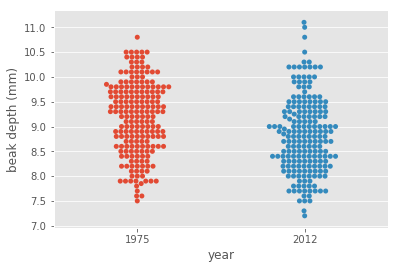

In [392]:
# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=beaks)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

#### ECDFs of beak depths
While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

In [16]:
bd_1975=np.array(beaks[beaks['year']==1975]['beak_depth'])
bd_2012=np.array(beaks[beaks['year']==2012]['beak_depth'])

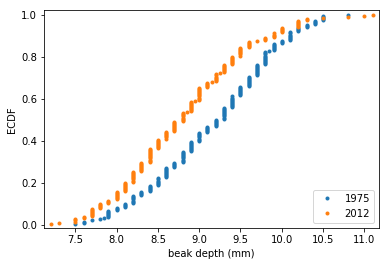

In [17]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

#### Parameter estimates of beak depths
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [18]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_1975)-np.mean(bd_2012)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_1975 - bs_replicates_2012

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.35 mm
95% confidence interval = [ 0.20374375  0.49575625] mm


#### Hypothesis test: Are beaks deeper in 2012?
Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [19]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0


### Variation of beak shapes
#### EDA of beak length and depth

The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). You still have the beak depth data stored in `bd_1975` and `bd_2012`. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

In [40]:
bks_1975=pd.read_csv('finch_beaks_1975.csv')
bks_2012=pd.read_csv('finch_beaks_2012.csv')
bks_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [41]:
bl_1975=np.array(bks_1975['Beak length, mm'].iloc[0:200])

bl_2012=np.array(bks_2012['blength'].iloc[0:200])

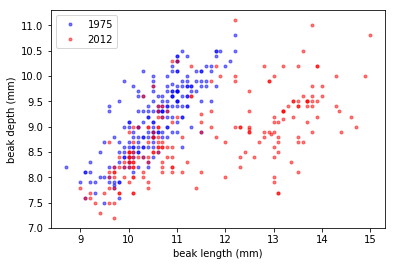

In [42]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', alpha=0.5, color='blue')

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', alpha=0.5, color='red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

### Linear regressions
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [43]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975,bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.851740824962 conf int = [ 0.77207216  0.93412575]
1975: intercept = 0.175042758814 conf int = [-0.71658278  1.02916297]
2012: slope = 0.295446516979 conf int = [ 0.24570653  0.34358056]
2012: intercept = 5.38787619204 conf int = [ 4.83840042  5.94647309]


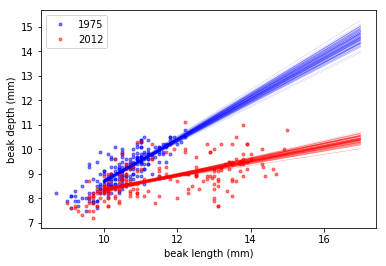

In [44]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x+bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x,x*bs_slope_reps_2012[i]+ bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

#### Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [45]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean,10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.15421125593 conf int = [ 1.14411096  1.16433063]
2012: mean ratio = 1.31716043979 conf int = [ 1.29192738  1.34297242]


### Calculation of heritability
#### EDA of heritability

The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species `G. scandens`. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `bd_parent_fortis`  and `bd_offspring_fortis` contain the same information about measurements from G. fortis birds.

In [50]:
bks_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [47]:
bks_1975.species.unique()

array(['fortis', 'scandens'], dtype=object)

In [69]:
# FORTIS 
bd_parent_fortis=bks_1975[bks_1975['species']=='fortis']['Beak depth, mm']
bd_parent_fortis=bd_parent_fortis.iloc[0:120]

bd_offspring_fortis=bks_2012 [bks_2012['species']== 'fortis']['bdepth']
bd_offspring_fortis=bd_offspring_fortis.iloc[0:120]

# SCANDES
bd_parent_scandens=bks_1975[bks_1975['species']=='scandens']['Beak depth, mm']
bd_parent_scandens=bd_parent_scandens.iloc[0:87]

bd_offspring_scandens=bks_2012 [bks_2012['species']== 'scandens']['bdepth']
bd_offspring_scandens=bd_offspring_scandens.iloc[0:87]

In [68]:
len(bd_offspring_scandens)

127

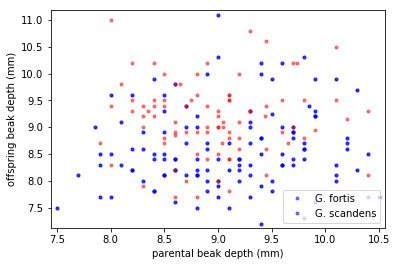

In [70]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

#### Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to modify that function to make a new function with call signature `draw_bs_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on the pairs samples defined by `func(bs_x, bs_y)`. In the next exercise, you will use `pearson_r` for func.

In [74]:
def draw_bs_pairs(x, y, func,  size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds =np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)
    

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds,len(inds))
        bs_x, bs_y = x[bs_inds],y[bs_inds]
        bs_replicates[i] = func(bs_x,bs_y)

    return bs_replicates

#### Pearson correlation of offspring and parental data

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [78]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens,pearson_r,1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r,1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: -0.000957534281509 [ nan  nan]
G. fortis: 0.107817015284 [-0.06185247  0.27612087]


C:\Users\compu\Anaconda3\envs\notebook\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [79]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0, 0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis,  bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: -0.00115905913375 [ nan  nan]
G. fortis: 0.114676273773 [-0.07541804  0.2880441 ]


C:\Users\compu\Anaconda3\envs\notebook\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [ ]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

# Simulating Coin Flips [playground]
The code below shows how you can use Python (and the `random` library) to simulate coin flips.

### Instructions

1. Read through te code below. What do you think you'll see when you run this code?

2. Run the code. How does the output compare to what you expected?

3. Run a few more times. Do you get the same result?

4. How might you change the code to ensure that the "percent heads" is **consistently** close to 50%? Try modifying the code so that the output is consistently within 1% of 50% (HINT: you can do this by changing ONE of the numbers in the first few lines of code).

In [77]:
import random as rd

num_trials = 100
heads = 0
tails = 0
p_heads = 0.5

for i in range(num_trials):
    random_number = rd.random()
    if random_number < p_heads:
        heads = heads + 1
    else:
        tails += 1

print("In", num_trials, "trials there were", heads, "heads and", tails, "tails")
print("PERCENT HEADS:", 100 * heads/num_trials, "percent")


In 100 trials there were 52 heads and 48 tails
PERCENT HEADS: 52.0 percent


In [78]:
def simulate_coin_flips(num_trials):
    heads = 0
    tails = 0
    p_heads = 0.5
    for i in range(num_trials):
        random_number = rd.random()
        if random_number < p_heads:
            heads = heads + 1
        else:
            tails += 1
    percent_heads = heads / num_trials
    return percent_heads
    
percentage = simulate_coin_flips(200)
print(percentage)

0.52


## Simulating Probabilities 
The code below shows one method for simulating dice rolls. Read through it and try to understand how it works. 

**What does the data stored in `roll_counts` represent?**

In [79]:
def simulate_dice_rolls(N):
    roll_counts = [0,0,0,0,0,0]
    for i in range(N):
        roll = rd.choice([1,2,3,4,5,6])
        index = roll - 1
        roll_counts[index] = roll_counts[index] + 1
    return roll_counts

def show_roll_data(roll_counts):
    number_of_sides_on_die = len(roll_counts)
    for i in range(number_of_sides_on_die):
        number_of_rolls = roll_counts[i]
        number_on_die = i+1
        print(number_on_die, "came up", number_of_rolls, "times")
        
roll_data = simulate_dice_rolls(1000)
show_roll_data(roll_data)

1 came up 181 times
2 came up 153 times
3 came up 178 times
4 came up 151 times
5 came up 157 times
6 came up 180 times


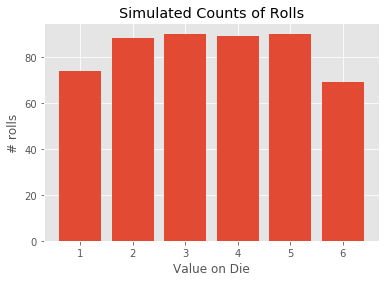

In [83]:
def visualize_one_die(roll_data):
    roll_outcomes = [1,2,3,4,5,6]
    fig, ax = plt.subplots()
    ax.bar(roll_outcomes, roll_data)
    ax.set_xlabel("Value on Die")
    ax.set_ylabel("# rolls")
    ax.set_title("Simulated Counts of Rolls")
    plt.show()
    
roll_data = simulate_dice_rolls(500)
visualize_one_die(roll_data)

## Probability of Collision [exercise]
\  Car 1|
  \     |
    \   |
Car 2 \ |  LEFT  | STRAIGHT | RIGHT
___________________________________
  LEFT  |  0.5   |  0.25    | 0.1
STRAIGHT|  0.25  |  0.02    | 0.1
 RIGHT  |  0.1   |  0.1     | 0.01
 
The truth table shown above represents the probability of two cars colliding at an intersection if they both attempt a maneuver at the same time. If Car 1 goes straight and car two goes left, for example, there is a probability of collision of 0.25.

In [93]:
def probability_of_collision(car_1, car_2):
    # car_1 and car_2 will each be strings whose value will either be 
    # "L" for left, "S" for straight, or "R" for right.
    probability = 0.0 # you should change this value based on the directions.
    L=[0.5,0.25,0.1]
    S=[0.25,0.02,0.1]
    R=[0.1,0.1,0.01]
    cars= [L,S,R]
    df=pd.DataFrame(cars,columns=['L','S','R'],index=['L','S','R'])
    
    if car_1 == "L":
        # your code here for when car 1 turns left
        
        probability=df[car_1][car_2]

    elif car_1 == "S":
        # your code here for when car 1 goes straight
        
        probability=df[car_1][car_2]

    else:
        # your code here for when car 1 turns right
        
        probability=df[car_1][car_2]
    
    return probability

In [94]:
# This function is used to test the correctness of your code. You shouldn't
# touch any of the code below here (but feel free to look through it to
# understand what "correct" looks like).
def test():
    num_correct = 0
    
    p1 = probability_of_collision("L", "L")
    if p1 == 0.5:
        num_correct += 1
    
    p2 = probability_of_collision("L", "R")
    if p2 == 0.1:
        num_correct += 1
    
    p3 = probability_of_collision("L", "S")
    if p3 == 0.25:
        num_correct += 1
    
    p4 = probability_of_collision("S", "R")
    if p4 == 0.1:
        num_correct += 1
    
    print("You got", num_correct, "out of 4 correct")
    
test()

0.5
0.1
0.25
0.1
You got 4 out of 4 correct


## Optimization Problems
**Brute Force Algortim**

1. Enumerate all possible combinations of items.
2. Remove all of the combinations whose total units exceeds the allowed weight
3. From the remaining combinations choose any one whose value is the largest

#### Search tree enumerates possibilities


